<a href="https://colab.research.google.com/github/flavioschneider/bachelorthesis/blob/master/generator_gridpattern_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'\nhidden = module.get_module()\nhidden = hidden / np.max(hidden) # normalize units\n\n# Evaluate norms:\nNUM_POINTS = 100000\npoints = np.random.randint(100, size=(NUM_POINTS, 2))\n\n# L1:\nL1 = 0\nfor i in range(NUM_POINTS):\n    for j in range(K**2):\n        L1 += hidden[j, points[i, 0], points[i, 1]]\nL1 = L1 / (NUM_POINTS + K**2)\nprint("L1: %s" % L1)\n\n# L2:\nL2 = 0\nfor i in range(NUM_POINTS):\n    for j in range(K**2):\n        L2 += hidden[j, points[i, 0], points[i, 1]]**2\nL2 = L2 / (NUM_POINTS + K**2)\nprint("L2: %s" % L2)\n\n\n'

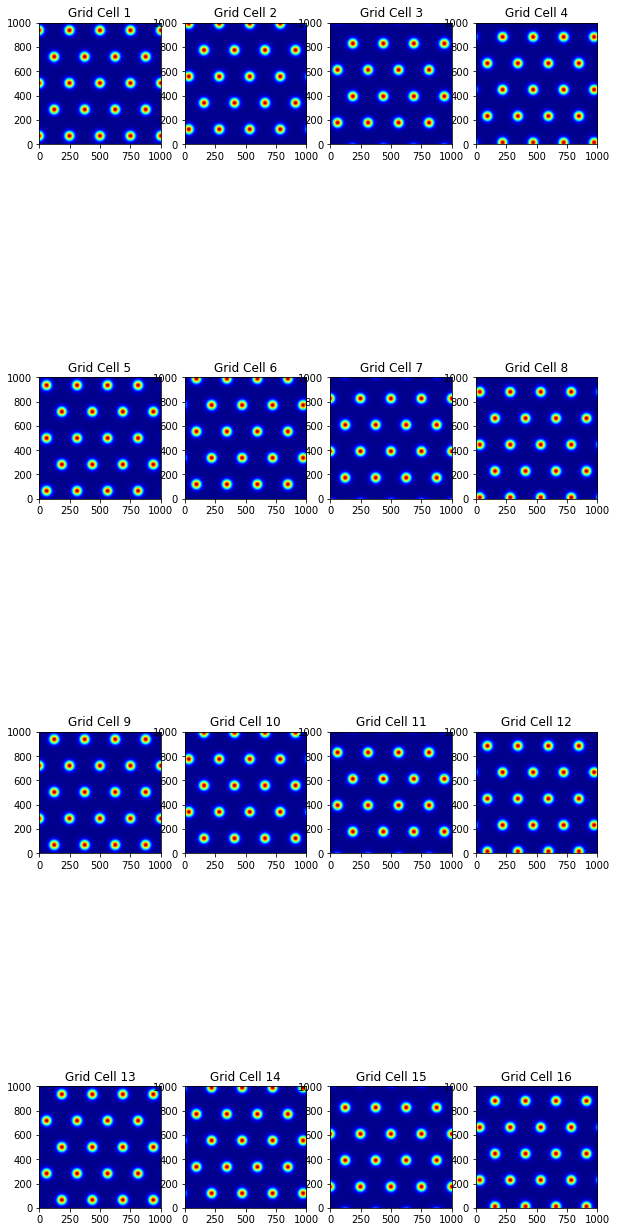

In [4]:
# Jupiter settings
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import matplotlib.pyplot as plt
import numpy as np
import math 
from scipy.stats import multivariate_normal

class GridModule():

    def __init__(self, res=100, dist=0.5, k=4, rot=0):
        self.res = res
        self.k = k 
        self.dist = dist 
        self.rot = rot
        self.std = 0.01 / k
        self.range = [-1,1]
        self.i_hat = np.array([math.cos(rot)*dist, math.sin(rot)*dist])
        self.j_hat = np.array([math.cos(rot+math.pi/3)*dist, math.sin(rot+math.pi/3)*dist])
        self.eval_points = self.compute_eval_points() 
        self.basis_matrix = np.column_stack((self.i_hat, self.j_hat))

    def compute_eval_points(self):
        x = np.linspace(self.range[0], self.range[1], IMG_RES)
        y = np.linspace(self.range[0], self.range[1], IMG_RES)
        xx, yy = np.meshgrid(x,y)
        return np.c_[xx.ravel(), yy.ravel()] 
                            
    def get_cell_pattern(self, x=0, y=0): 
        steps = np.arange(-5, 5, 1)
        gridx, gridy = np.meshgrid(steps, steps)
        coeff_matrix = np.array([gridx.flatten(), gridy.flatten()])
        shift = x*(self.i_hat / self.k) + y*(self.j_hat / self.k)
        means = np.matmul(self.basis_matrix, coeff_matrix).T + shift
        grid_pattern = np.zeros((self.res ** 2))
        cov = np.diag(np.repeat(self.std, 2))

        for i in range(means.shape[0]):
            gaussian = multivariate_normal(mean=means[i], cov=cov)
            grid_pattern += gaussian.pdf(self.eval_points)

        return grid_pattern.reshape((self.res, self.res))

    def get_module(self):
        grid_module = np.zeros((self.k**2, self.res, self.res))
        for x in range(self.k):
            for y in range(self.k): 
                grid_module[x*self.k+y] = self.get_cell_pattern(x,y)
        return grid_module 

    def display_cell(self, x=0, y=0):
        cell = self.get_cell_pattern(x,y)
        plt.ylim(0, self.res)
        plt.xlim(0, self.res)
        plt.imshow(cell); 
        plt.show()

    def display_module(self):
        grids = self.get_module()
        COLS = 4;
        fig, axs = plt.subplots(self.k, self.k, figsize=(10, 25))
        i = 0
        for ax in axs.flat:
            ax.imshow(grids[i], vmin=-1, cmap="jet")
            ax.set_ylim(0, self.res)
            ax.set_xlim(0, self.res)
            ax.set_title("Grid Cell %s"%(i+1))
            i+=1 
    
    def display_overlap(self):
        grids = self.get_module()
        area = np.zeros((self.res, self.res))
        for i in range(self.k**2): 
            area += grids[i] * (1.0/self.k)

        fig = plt.figure(figsize=(20,20))
        fig.add_axes();
        ax = fig.add_subplot(111)
        plt.ylim(0, self.res)
        plt.xlim(0, self.res)
        
        ax.imshow(area, cmap='jet'); 
    

IMG_RES = 1000
K = 4
module = GridModule(res=IMG_RES, k=K) 
module.display_module() 
#module.display_overlap() 

"""
hidden = module.get_module()
hidden = hidden / np.max(hidden) # normalize units

# Evaluate norms:
NUM_POINTS = 100000
points = np.random.randint(100, size=(NUM_POINTS, 2))

# L1:
L1 = 0
for i in range(NUM_POINTS):
    for j in range(K**2):
        L1 += hidden[j, points[i, 0], points[i, 1]]
L1 = L1 / (NUM_POINTS + K**2)
print("L1: %s" % L1)

# L2:
L2 = 0
for i in range(NUM_POINTS):
    for j in range(K**2):
        L2 += hidden[j, points[i, 0], points[i, 1]]**2
L2 = L2 / (NUM_POINTS + K**2)
print("L2: %s" % L2)


"""
